# Homework set 3 -- Advanced Calculus

In [2]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
import abc
from typing import Tuple, Union

## Exercise 2b

False False False


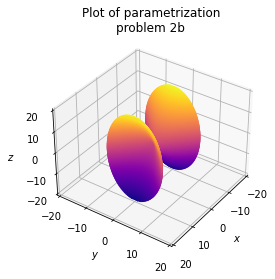

In [3]:
def has_nan(arr: np.ndarray) -> bool:
    return any(np.isnan(arr).reshape(-1))

def plot_2b_as_given():
    u = np.linspace(-10, 10, 200, dtype=np.float)
    v = np.linspace(0, 2*np.pi, 200, dtype=np.float)

    U, V = np.meshgrid(u, v)
    x = U
    y = np.cos(V) * U
    z = 2*np.sin(V)*U

    # Check if no invalid values encountered

    print(has_nan(x), has_nan(y), has_nan(z))
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(x, y, z, 200, cmap='plasma')

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    
    ax.set_xlim([-20, 20])
    ax.set_ylim([-20, 20])
    ax.set_zlim([-20, 20])

    ax.set_title("Plot of parametrization\nproblem 2b")
    ax.view_init(35, 35) # Angle at which plot is shown

    fig.savefig("ex2b_parametric.pdf")


plot_2b_as_given()

### Explicit formula (2b)

$4 x^2 = 4y^2 + z^2$

or, equivalently:

$x = \pm \sqrt{\frac{1}{4}z^2 + y^2}$.

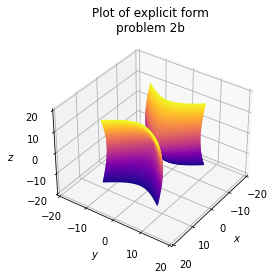

In [4]:
def plot_2b_explicit_form():

    y = np.linspace(-10, 10, 200)
    z = np.linspace(-15, 15, 200)

    Y, Z = np.meshgrid(y, z)

    X_plus = np.sqrt(0.25*np.power(Z, 2) + np.power(Y, 2))
    X_min = - np.sqrt(0.25*np.power(Z, 2) + np.power(Y, 2))

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X_plus, Y, Z, 100, cmap='plasma')
    ax.contour3D(X_min, Y, Z, 100, cmap='plasma')

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    
    ax.set_xlim([-20, 20])
    ax.set_ylim([-20, 20])
    ax.set_zlim([-20, 20])

    ax.set_title("Plot of explicit form\nproblem 2b")
    ax.view_init(35, 35) # Angle at which plot is shown

    fig.savefig("ex2b_explicit.pdf")

plot_2b_explicit_form()

## Exercise 2c

We need shape obtained by rotating $y = z^2 + 1$ with $x = 0$ around the z-axis.

When rotating 90° (in either direction), we have $\pm x = z^2 +1$ with $y = 0$.

Also, when rotating 180°, we have $-y = z^2 + 1, x=0$.

Clearly, the height-lines in the (x,y)-plane of the surface are circles 
(as a product of rotation around the z-axis).

So
$\sqrt{x^2 + y^2} = z^2 + 1$ 
provides these height-lines while also satisfying the earlier equations.

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


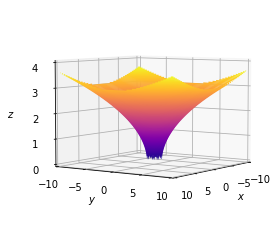

In [5]:
def plot_2c():
    xy_limits = [-10, 10]
    x = np.linspace(xy_limits[0], xy_limits[1], 200)
    y = np.linspace(xy_limits[0], xy_limits[1], 200)

    X, Y = np.meshgrid(x, y)

    Z_plus = np.sqrt(np.sqrt(np.power(X, 2) + np.power(Y, 2)) - 1)
    Z_min = - Z_plus

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z_plus, 100, cmap='plasma')
    # ax.contour3D(X, Y, Z_min, 100, cmap='plasma')

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    
    ax.set_xlim(xy_limits)
    ax.set_ylim(xy_limits)
    ax.set_zlim([0, 4])

    ax.set_title("")
    ax.view_init(5, 35) # Angle at which plot is shown

    fig.savefig("ex2c.pdf")

plot_2c()

## Exercise 3

### 3a
Given: $x^2 -2y^2 -z^2 = 2$.

Equivalent to: $z = \pm \sqrt{2 +x^2 - 2y^2}$.

**This is a hyperboloid!**
Parallel to the $x$-axis.
So in the ($y$, $z$)-plane it are circles,
and two weird mirrored wobbly curves in both the ($x$, $z$)-plane and ($x$, $y$)-plane.

Want: functions $x(r, \theta)$, $y(r, \theta)$, $z(r, \theta)$.

Let $r$ be the radius from the $x$-axis (the radius from the origin in the ($y$, $z$)-plane),
and let $\theta$ be the angle in the ($y$, $z$)-plane.

Then:
* $y(r, \theta) := r\cos(\theta)$
* $z(r, \theta) := r\sin(\theta)$
* $\Rightarrow x(r, \theta) = \pm \sqrt{2 + r^2 (2\sin^2(\theta) + \cos^2(\theta))}$

    (could be simplified as $x(r, \theta) = \pm \sqrt{2 + r^2 (1 + \sin^2(\theta))}$)

Note: substituting the functions back in $x^2 -2y^2 -z^2 = 2$ and simplifying yields $2=2$ 🙂. 

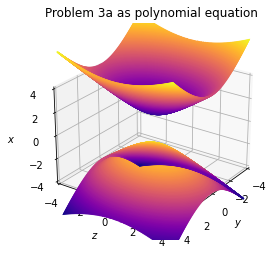

In [19]:
def plot_3a_as_given():
    xy_limits = [-4, 4]
    y = np.linspace(xy_limits[0], xy_limits[1], 200)
    z = np.linspace(xy_limits[0], xy_limits[1], 200)

    Y, Z = np.meshgrid(y, z)

    X_plus = np.sqrt(2 + 2*np.power(Y, 2) + np.power(Z, 2))
    X_min = - X_plus

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(Y, Z, X_plus, 300, cmap='plasma')
    ax.contour3D(Y, Z, X_min, 300, cmap='plasma')

    ax.set_xlabel('$y$')
    ax.set_ylabel('$z$')
    ax.set_zlabel('$x$')
    
    ax.set_xlim(xy_limits)
    ax.set_ylim(xy_limits)
    ax.set_zlim([-4, 4])

    ax.set_title("Problem 3a as polynomial equation")
    ax.view_init(25, 35) # Angle at which plot is shown

    fig.savefig("ex3a_equation.pdf")

plot_3a_as_given()

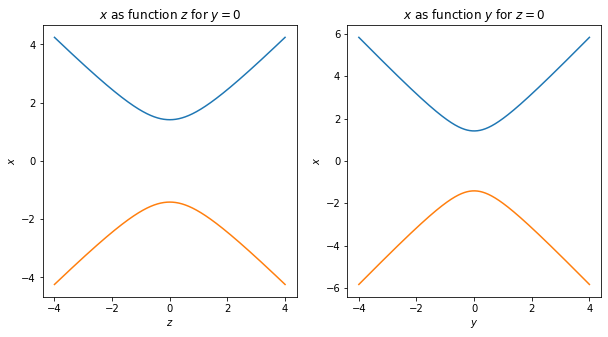

In [20]:
def plot_3a_for_x():
    limits = [-4, 4]
    z = np.linspace(limits[0], limits[1], 800)
    y = np.linspace(limits[0], limits[1], 800)

    

    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
    ax1 = axes[0]
    ax2 = axes[1]

    x_of_z_plus = np.sqrt(2 + np.power(z, 2))
    x_of_z_min = - x_of_z_plus
    ax1.plot(z, x_of_z_plus)
    ax1.plot(z, x_of_z_min)
    ax1.set_xlabel('$z$')
    ax1.set_ylabel('$x$')
    ax1.set_title('$x$ as function $z$ for $y=0$')

    x_of_y_plus = np.sqrt(2 + 2*np.power(y, 2))
    x_of_y_min = - x_of_y_plus
    ax2.plot(y, x_of_y_plus)
    ax2.plot(y, x_of_y_min)
    ax2.set_xlabel('$y$')
    ax2.set_ylabel('$x$')
    ax2.set_title('$x$ as function $y$ for $z=0$')

    fig.savefig("ex3a_2d.pdf")
    
    # ax.set_xlim(xy_limits)
    # ax.set_ylim(xy_limits)
    # ax.set_zlim([-4, 4])

    # ax.set_title("Problem 3a as polynomial equation")
    # ax.view_init(15, 35) # Angle at which plot is shown

plot_3a_for_x()

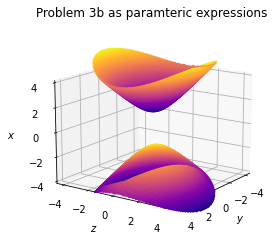

In [25]:


def plot_3a_parametric():
    r_limits = [0, 4]
    θ_limits = [0, 2*np.pi]
    r = np.linspace(r_limits[0], r_limits[1], 200)
    # r_min = np.linspace(r_limits[0], 0, 100)
    # r_plus = np.linspace(0, r_limits[1], 100)
    # r = np.concatenate((r_min, r_plus))
    θ = np.linspace(θ_limits[0], θ_limits[1], 200)

    R, Θ = np.meshgrid(r, θ)

    y = R * np.cos(Θ)
    z = R * np.sin(Θ)
    x_plus = np.sqrt(2 + np.power(R, 2) * (np.power(np.cos(Θ), 2) + 2*np.power(np.sin(Θ),2)))
    x_min = - x_plus

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(y, z, x_plus, 100, cmap='plasma')
    ax.contour3D(y, z, x_min, 100, cmap='plasma')

    ax.set_xlabel('$y$')
    ax.set_ylabel('$z$')
    ax.set_zlabel('$x$')
    
    ax.set_zlim([-4, 4])

    ax.set_title("Problem 3b as paramteric expressions")
    ax.view_init(15, 35) # Angle at which plot is shown

    fig.savefig("ex3a_parametric.pdf")

plot_3a_parametric()